In [17]:
import matplotlib.pyplot as plt
import cmasher as cmr
import numpy as np
import h5py
import pickle
from synthesizer.particle import Stars, Gas, Galaxy


In [18]:
# set style
plt.style.use('../../matplotlibrc.txt')

Initialise stars object

In [19]:
import pickle

snap_z = 2.00202813925285
id = '145492'

galaxy = pickle.load(open(f'data/galaxy_{id}.pck','rb'))

In [20]:
# boost attenuation because it seems very low

galaxy.stars.tau_v *= 5.

In [21]:
from synthesizer.grid import Grid

grid_dir = '/Users/sw376/Dropbox/Research/data/synthesizer/grids/'
grid_name = 'bpass-2.2.1-bin_chabrier03-0.1,300.0_cloudy-c23.01-sps'
grid = Grid(grid_name, grid_dir=grid_dir, new_lam=np.arange(800., 10000., 10.))

In [22]:

# galaxy.stars.get_particle_spectra_reprocessed(grid)

In [23]:
galaxy.stars.get_particle_spectra_screen(grid, tau_v=galaxy.stars.tau_v)


In [24]:
integrated_spectra = galaxy.stars.calculate_integrated_spectra()

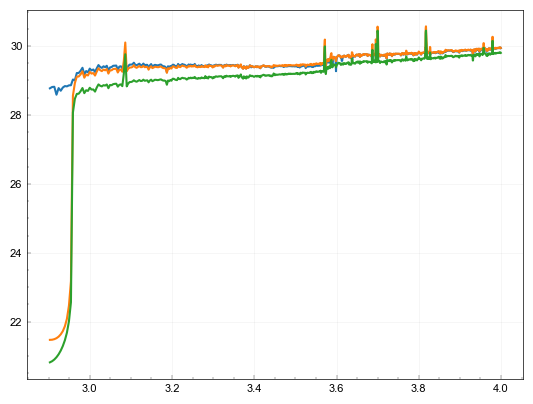

In [25]:
plt.plot(np.log10(integrated_spectra['incident'].lam), np.log10(integrated_spectra['incident'].lnu))
plt.plot(np.log10(integrated_spectra['intrinsic'].lam), np.log10(integrated_spectra['intrinsic'].lnu))
plt.plot(np.log10(integrated_spectra['attenuated'].lam), np.log10(integrated_spectra['attenuated'].lnu))
plt.show()

In [28]:
import copy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from synthesizer.grid import Grid
import cmasher as cmr


wavelength_limits = [800, 10000]
luminosity_limits = [28., 31.]


# set style
plt.style.use('../../matplotlibrc.txt')


fig = plt.figure(figsize=(7.0, 4.5))

left = 0.15
width = 0.8
bottom = 0.1
height = 0.6

ax = fig.add_axes((left, bottom, width, height))


reference_metallicity = 0.01

grid_point = (0, 5)

sed = integrated_spectra['incident']
ax.plot(sed.lam, np.log10(sed.lnu), lw=2, c='0.8', alpha=0.3)

sed = integrated_spectra['intrinsic']
ax.plot(sed.lam, np.log10(sed.lnu), lw=1, c='0.5', alpha=1.0)

sed = integrated_spectra['attenuated']
ax.plot(sed.lam, np.log10(sed.lnu), lw=1, c='k', alpha=1.0)


ax.set_xlim(wavelength_limits)
ax.set_ylim(luminosity_limits)

ax.set_ylabel(r'$\rm \log_{10}(L_{\nu}/erg\ s^{-1}\ Hz^{-1}\ M_{\odot}^{-1})$')
ax.set_xlabel(r'$\rm \lambda/\AA$')

fig.savefig(f'figs/tng_spectra.pdf')
fig.clf()



<Figure size 700x450 with 0 Axes>